In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.sample()

,Cabin,Ticket,number,Survived
857,E17,113055,A,1


In [4]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

In [9]:
fig = df['number'].value_counts()

In [7]:
fig

A    139
6    131
1    129
2    126
4    126
5    123
3    117
Name: number, dtype: int64

Text(0.5, 1.0, 'Passenger travelling with')

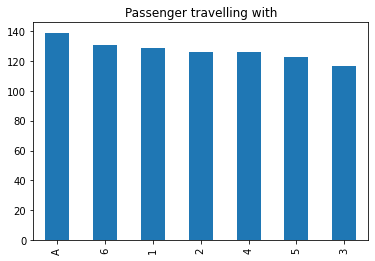

In [11]:
fig = df['number'].value_counts().plot.bar()
fig.set_title('Passenger travelling with')

In [12]:
#Extract numerical part
df['number_numerical'] = pd.to_numeric(df["number"],errors='coerce',downcast='integer')

In [16]:
df.sample(4)

,Cabin,Ticket,number,Survived,number_numerical
400,NaN,STON/O 2. 3101289,3,1,3.0
47,NaN,14311,1,1,1.0
262,E67,110413,4,0,4.0
663,NaN,349210,A,0,NaN


In [18]:
df['number_categorical'] = np.where(df['number_numerical'].isnull(),df['number'],np.nan)

In [19]:
df.sample(5)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
503,NaN,4135,2,0,2.0,NaN
874,NaN,P/PP 3381,4,1,4.0,NaN
342,NaN,248740,A,0,NaN,A
516,F33,C.A. 34260,1,1,1.0,NaN
877,NaN,349212,5,0,5.0,NaN


## number column is transformed..now it's time for cabin and ticket

In [21]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [22]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

## Extracting the cabin column

In [23]:
df['cabin_num'] = df['Cabin'].str.extract('(\d+)') #captures the numerical part
df['cabin_cat'] = df['Cabin'].str[0] #captures the first letter

In [28]:
df.sample(5)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
153,NaN,A/5. 851,4,0,4.0,NaN,NaN,NaN
230,C83,36973,3,1,3.0,NaN,83,C
285,NaN,349239,4,0,4.0,NaN,NaN,NaN
865,NaN,236852,5,1,5.0,NaN,NaN,NaN
611,NaN,SOTON/O.Q. 3101305,2,0,2.0,NaN,NaN,NaN


<AxesSubplot:>

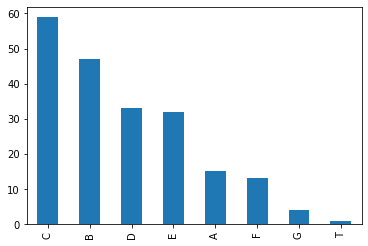

In [30]:
df['cabin_cat'].value_counts().plot(kind='bar')

In [31]:
# Extract the last bit of ticket as number

df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],errors='coerce',downcast='integer')

In [32]:
# Extracting the first part of ticket as category

df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(),np.nan,df['ticket_cat'])

In [36]:
df.sample(10)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
225,NaN,PP 4348,6,0,6.0,NaN,NaN,NaN,4348.0,PP
377,C82,113503,2,0,2.0,NaN,82,C,113503.0,NaN
211,NaN,F.C.C. 13528,3,1,3.0,NaN,NaN,NaN,13528.0,F.C.C.
494,NaN,A/4 45380,2,0,2.0,NaN,NaN,NaN,45380.0,A/4
53,NaN,2926,4,1,4.0,NaN,NaN,NaN,2926.0,NaN
558,E67,110413,1,1,1.0,NaN,67,E,110413.0,NaN
692,NaN,1601,4,1,4.0,NaN,NaN,NaN,1601.0,NaN
317,NaN,29011,4,0,4.0,NaN,NaN,NaN,29011.0,NaN
294,NaN,349233,5,0,5.0,NaN,NaN,NaN,349233.0,NaN
329,B18,111361,5,1,5.0,NaN,18,B,111361.0,NaN


In [37]:
df['ticket_cat'].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)